<a href="https://colab.research.google.com/github/KrungSalad/Google_Colab/blob/master/filling%20Missing%20GPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pip install folium
#pip install gmplot
# lat 13.65000000 - 14.45000000
#lon  101 - 102

In [0]:
import numpy as np
import pandas as pd
import folium
from folium import plugins
import gmplot

In [0]:
df0 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_00.zip', compression='zip' )
df1 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_03.zip', compression='zip' )
df2 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_06.zip', compression='zip' )
df3 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_09.zip', compression='zip' )
df4 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_12.zip', compression='zip' )
df5 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_15.zip', compression='zip' )
df6 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_18.zip', compression='zip' )
df7 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_21.zip', compression='zip' )
#df8 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_06.zip', compression='zip' )
#df9 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_09.zip', compression='zip' )
#df10 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_12.zip', compression='zip' )
#df11 = pd.read_csv('C:/Users/Krung/Desktop/Project/veh_tx_data-20200404T070301Z-001/veh_tx_data/2019-11-10_12.zip', compression='zip' )

df = pd.concat ([df0,df1,df2,df3,df4,df5,df6,df7])
df.index = df['time_stamp']
df = df[["vid","lat","lon","speed","unit_type"]] 
df

vid        lat  \
time_stamp                                                                 
2019-11-10 00:00:31  7F48F312227AC243E5871053FE731A21DFC6DB90  15.260423   
2019-11-10 00:00:39  EB946EC08F07BC08055AD1E2F2D84D1FFCF5A5A5  14.092710   
2019-11-10 00:00:47  C02443BB2993A1F608E67ACB6DD305729A15CF33   7.619666   
2019-11-10 00:00:45  77A5E3079F7138CFD9603F6645D5617D3149EE67  18.343505   
2019-11-10 00:00:04  B40E073F041D20981BED62D73EF19A4A92ADC41F  14.210700   
...                                                       ...        ...   
2019-11-10 23:59:25  C45FDA94A8001C0705605270C6E81247BB6CF6C9  14.816370   
2019-11-10 23:59:25  C45FDA94A8001C0705605270C6E81247BB6CF6C9  14.816370   
2019-11-10 23:59:54  C45FDA94A8001C0705605270C6E81247BB6CF6C9  14.821125   
2019-11-10 23:59:00  EC533E339E7DD178D18E54436C0E02A5538FBC04  14.066475   
2019-11-10 23:59:00  89A62AFCAB60CBF341618E206E2EA11BD85B4F55  13.871200   

                            lon  speed  unit_type  
time_stamp                                         
2019-11-10 00:00:31  100.320070      0        3.0  
2019-11-10 00:00:39  100.630753      0        NaN  
2019-11-10 00:00:47  100.069107      0        NaN  
2019-11-10 00:00:45   98.681050      0        8.0  
2019-11-10 00:00:04  100.721000      0        7.0  
...                         ...    ...        ...  
2019-11-10 23:59:25  101.542281     66        8.0  
2019-11-10 23:59:25  101.542281     66        8.0  
2019-11-10 23:59:54  101.542551     67        8.0  
2019-11-10 23:59:00  100.682065     50        7.0  
2019-11-10 23:59:00   99.992880      0        8.0  

[48732538 rows x 5 columns]

In [0]:
df = df[df["speed"]>0]  # speed != 0 

In [0]:
df.sort_values("vid" , inplace = True)   # sort vid
df

C:\Users\Krung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


vid        lat  \
time_stamp                                                                 
2019-11-10 06:18:46  00001669BDC68A49FAAF6A88E7FF5F1BA5F9B2EE  13.684433   
2019-11-10 07:27:01  00001669BDC68A49FAAF6A88E7FF5F1BA5F9B2EE  13.698029   
2019-11-10 07:30:01  00001669BDC68A49FAAF6A88E7FF5F1BA5F9B2EE  13.709824   
2019-11-10 07:42:01  00001669BDC68A49FAAF6A88E7FF5F1BA5F9B2EE  13.735519   
2019-11-10 07:39:01  00001669BDC68A49FAAF6A88E7FF5F1BA5F9B2EE  13.736618   
...                                                       ...        ...   
2019-11-10 21:48:34  FFFF83799A19A93DFF034F78A7AC3B9D2AF3FC71  18.303020   
2019-11-10 18:43:17  FFFF83799A19A93DFF034F78A7AC3B9D2AF3FC71  18.321320   
2019-11-10 21:16:15  FFFF83799A19A93DFF034F78A7AC3B9D2AF3FC71  18.149737   
2019-11-10 21:14:14  FFFF83799A19A93DFF034F78A7AC3B9D2AF3FC71  18.154747   
2019-11-10 21:12:13  FFFF83799A19A93DFF034F78A7AC3B9D2AF3FC71  18.164223   

                            lon  speed  unit_type  
time_stamp                                         
2019-11-10 06:18:46  100.545639      1        NaN  
2019-11-10 07:27:01  100.498062     21        NaN  
2019-11-10 07:30:01  100.510986     17        NaN  
2019-11-10 07:42:01  100.521332      4        NaN  
2019-11-10 07:39:01  100.519501      1        NaN  
...                         ...    ...        ...  
2019-11-10 21:48:34  100.287218     74        3.0  
2019-11-10 18:43:17   99.336198     84        3.0  
2019-11-10 21:16:15  100.089172     46        3.0  
2019-11-10 21:14:14  100.079855     60        3.0  
2019-11-10 21:12:13  100.068668     46        3.0  

[7963522 rows x 5 columns]

In [0]:
'''speed_avg = df[["vid","speed"]].groupby("vid").mean()   # find speed_avg groupby vid --> speed_avg
speed_avg.rename(columns={'speed':'speed_avg'} , inplace = True) 
speed_avg'''

'speed_avg = df[["vid","speed"]].groupby("vid").mean()   # find speed_avg groupby vid --> speed_avg\nspeed_avg.rename(columns={\'speed\':\'speed_avg\'} , inplace = True) \nspeed_avg'

In [0]:
'''lat_min = df[["vid","lat"]].groupby("vid").min()  # find lat_min , lat_max groupby vid --> report_lat
lat_max = df[["vid","lat"]].groupby("vid").max()
lat_min.rename(columns={'lat':'lat_min'} , inplace = True)
lat_max.rename(columns={'lat':'lat_max'} , inplace = True)
report_lat = pd.concat([lat_min,lat_max], axis=1)'''

'lat_min = df[["vid","lat"]].groupby("vid").min()  # find lat_min , lat_max groupby vid --> report_lat\nlat_max = df[["vid","lat"]].groupby("vid").max()\nlat_min.rename(columns={\'lat\':\'lat_min\'} , inplace = True)\nlat_max.rename(columns={\'lat\':\'lat_max\'} , inplace = True)\nreport_lat = pd.concat([lat_min,lat_max], axis=1)'

In [0]:
'''lon_min = df[["vid","lon"]].groupby("vid").min()  # find lon_min , lon_max groupby vid --> report_lon
lon_max = df[["vid","lon"]].groupby("vid").max()
lon_min.rename(columns={'lon':'lon_min'} , inplace = True)
lon_max.rename(columns={'lon':'lon_max'} , inplace = True)
report_lon = pd.concat([lon_min,lon_max], axis=1)'''

'lon_min = df[["vid","lon"]].groupby("vid").min()  # find lon_min , lon_max groupby vid --> report_lon\nlon_max = df[["vid","lon"]].groupby("vid").max()\nlon_min.rename(columns={\'lon\':\'lon_min\'} , inplace = True)\nlon_max.rename(columns={\'lon\':\'lon_max\'} , inplace = True)\nreport_lon = pd.concat([lon_min,lon_max], axis=1)'

In [0]:
'''report_distance = pd.concat([report_lat,report_lon,speed_avg] , axis = 1) # report_distance = report_lat + report_lon + speed_avg
report_distance'''

'report_distance = pd.concat([report_lat,report_lon,speed_avg] , axis = 1) # report_distance = report_lat + report_lon + speed_avg\nreport_distance'

In [0]:
'''print(report_lat[report_lat["lat_max"]-report_lat["lat_min"]>1]) # 1 lat = 111 km | 1 lon = 111 km
print(report_lon[report_lon["lon_max"]-report_lon["lon_min"]>1])'''

'print(report_lat[report_lat["lat_max"]-report_lat["lat_min"]>1]) # 1 lat = 111 km | 1 lon = 111 km\nprint(report_lon[report_lon["lon_max"]-report_lon["lon_min"]>1])'

In [0]:
'''data = df[df["vid"]=='0000AC08D7A617D7B421C9FCE2DD080C9270DD7D'] # choose car(vid) from df for plot in map
find_car = df[df["vid"]=='0007CAF5959FF5182869874E35181E8432759173']
points = [(lat,lon) for lat,lon in zip(find_car["lat"],find_car["lon"])]'''

'data = df[df["vid"]==\'0000AC08D7A617D7B421C9FCE2DD080C9270DD7D\'] # choose car(vid) from df for plot in map\nfind_car = df[df["vid"]==\'0007CAF5959FF5182869874E35181E8432759173\']\npoints = [(lat,lon) for lat,lon in zip(find_car["lat"],find_car["lon"])]'

In [0]:
'''m = folium.Map(       # plot GPS of car(vid) in map
    width='85%', 
    height='85%',
    location=[13.655450,	102.799183	],
    zoom_start=8,
    tiles='Stamen Terrain'
)
m.add_child(plugins.HeatMap(points))

m'''

"m = folium.Map(       # plot GPS of car(vid) in map\n    width='85%', \n    height='85%',\n    location=[13.655450,\t102.799183\t],\n    zoom_start=8,\n    tiles='Stamen Terrain'\n)\nm.add_child(plugins.HeatMap(points))\n\nm"

In [0]:
'''df.to_csv('C:/Users/Krung/Desktop/Project/data.csv')
report_distance.to_csv('C:/Users/Krung/Desktop/Project/report_distance.csv')'''

"df.to_csv('C:/Users/Krung/Desktop/Project/data.csv')\nreport_distance.to_csv('C:/Users/Krung/Desktop/Project/report_distance.csv')"

In [0]:
# เลือกเฉพาะข้อมูลที่มีพิกัดอยู่ในจังหวัดปราจีนบุรี
dd = df[df['lat']>13.65]
dd = dd[dd['lat']<14.45]
dd = dd[dd['lon']>101]
dd = dd[dd['lon']<102]
dd

vid        lat  \
time_stamp                                                                 
2019-11-10 09:22:30  00033FB44E310CCEBE14170511AA085D8C6F5D72  13.711517   
2019-11-10 10:37:44  0009CDF6B91678DA38A71FEA98E385DCBA37D701  13.726471   
2019-11-10 19:28:12  0009CDF6B91678DA38A71FEA98E385DCBA37D701  14.370948   
2019-11-10 11:27:23  0009CDF6B91678DA38A71FEA98E385DCBA37D701  13.999584   
2019-11-10 19:39:12  0009CDF6B91678DA38A71FEA98E385DCBA37D701  14.281365   
...                                                       ...        ...   
2019-11-10 20:40:13  FFF901395C6A846426CDA38224A9812C89C84B40  13.652750   
2019-11-10 16:07:16  FFF901395C6A846426CDA38224A9812C89C84B40  13.652730   
2019-11-10 08:54:04  FFF901395C6A846426CDA38224A9812C89C84B40  13.652778   
2019-11-10 20:40:13  FFF901395C6A846426CDA38224A9812C89C84B40  13.652750   
2019-11-10 08:05:26  FFFCB1B8AC3435DA007137AF7BB34F56A0C0C6B8  14.145203   

                            lon  speed  unit_type  
time_stamp                                         
2019-11-10 09:22:30  101.301883     89        1.0  
2019-11-10 10:37:44  101.327863     61        7.0  
2019-11-10 19:28:12  101.089389     65        7.0  
2019-11-10 11:27:23  101.221028     25        7.0  
2019-11-10 19:39:12  101.066831     50        7.0  
...                         ...    ...        ...  
2019-11-10 20:40:13  101.064383      1        8.0  
2019-11-10 16:07:16  101.064294      1        8.0  
2019-11-10 08:54:04  101.064155      2        8.0  
2019-11-10 20:40:13  101.064383      1        8.0  
2019-11-10 08:05:26  101.370286     55        3.0  

[228978 rows x 5 columns]

In [0]:
#นำพิกัดทั้งหมดที่อยู่ในจังหวัดปราจีนมาแสดงบนแผนที่
p = [(lat,lon) for lat,lon in zip(dd["lat"],dd["lon"])]
m = folium.Map(       
    width='85%', 
    height='85%',
    location=[13.655450,	102.799183	],
    zoom_start=8,
    tiles='Stamen Terrain'
)
m.add_child(plugins.HeatMap(p))

m

In [0]:
#import matplotlib.pyplot as plt
#z = find_car[['lat','lon']]

In [0]:
#z

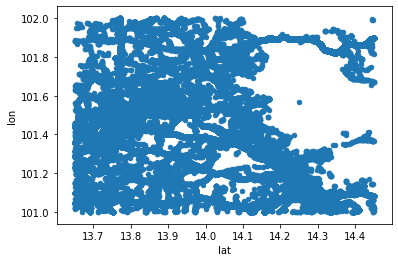

In [0]:
#นำพิกัดในจังหวัดปราจีนมา plot ในกราฟ
dd.plot.scatter(x = 'lat',y='lon')

In [0]:
#dd[['vid','lat','lon']]

In [0]:
#เตรียมข้อมูลเข้า KMean ใช้ข้อมูลชื่อว่า km
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
km = dd[['vid','lat','lon']]
km

vid        lat  \
time_stamp                                                                 
2019-11-10 09:22:30  00033FB44E310CCEBE14170511AA085D8C6F5D72  13.711517   
2019-11-10 10:37:44  0009CDF6B91678DA38A71FEA98E385DCBA37D701  13.726471   
2019-11-10 19:28:12  0009CDF6B91678DA38A71FEA98E385DCBA37D701  14.370948   
2019-11-10 11:27:23  0009CDF6B91678DA38A71FEA98E385DCBA37D701  13.999584   
2019-11-10 19:39:12  0009CDF6B91678DA38A71FEA98E385DCBA37D701  14.281365   
...                                                       ...        ...   
2019-11-10 20:40:13  FFF901395C6A846426CDA38224A9812C89C84B40  13.652750   
2019-11-10 16:07:16  FFF901395C6A846426CDA38224A9812C89C84B40  13.652730   
2019-11-10 08:54:04  FFF901395C6A846426CDA38224A9812C89C84B40  13.652778   
2019-11-10 20:40:13  FFF901395C6A846426CDA38224A9812C89C84B40  13.652750   
2019-11-10 08:05:26  FFFCB1B8AC3435DA007137AF7BB34F56A0C0C6B8  14.145203   

                            lon  
time_stamp                       
2019-11-10 09:22:30  101.301883  
2019-11-10 10:37:44  101.327863  
2019-11-10 19:28:12  101.089389  
2019-11-10 11:27:23  101.221028  
2019-11-10 19:39:12  101.066831  
...                         ...  
2019-11-10 20:40:13  101.064383  
2019-11-10 16:07:16  101.064294  
2019-11-10 08:54:04  101.064155  
2019-11-10 20:40:13  101.064383  
2019-11-10 08:05:26  101.370286  

[228978 rows x 3 columns]

In [0]:
#หา score ของ cluster ในแต่ละ K เพื่อเลือก K ที่ดีที่สุด
K_clusters = range(1,35)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = km[['lat']]
X_axis = km[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

KeyboardInterrupt: 

In [0]:
#นำข้อมูลที่เตรียมไว้(km)มาเข้า model KMeans เพื่อหา centers ของแต่ละจุดพิกัด
kmeans = KMeans(n_clusters = 350, init ='k-means++')
kmeans.fit(km[km.columns[1:3]])
km['cluster_label'] = kmeans.fit_predict(km[km.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(km[km.columns[1:3]])
km.cluster_label.unique()


C:\Users\Krung\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([237, 274, 173, 342, 114,  16,  83, 145, 301,  19,  86, 150, 299,
       128, 328, 380, 287,  42, 371,  69, 306, 151,  35,  55, 264, 267,
       207, 278, 132,  38,  13,  94, 245,   0, 350, 167,  15, 281, 289,
       250,  58, 165, 129, 361,  89, 107,  51, 195, 277, 199, 389,   3,
        11, 248,  82, 338,  60, 140, 243, 316,   2,  85,   7,  67,  47,
       147, 263,  45, 246, 298, 255, 393, 142, 235, 284, 224, 326,  62,
       318, 242, 247,  56,  31, 218, 100, 220, 170, 239,  72, 329,  41,
        63, 228,  65, 148,  20,  28,  26, 233,  97, 174,  57, 337,  21,
       360, 275, 183, 106, 155, 363, 103, 332, 269, 204, 391, 283, 376,
       377,   4, 164, 203,  54, 303,  61,  71,  23, 396, 261,  96, 336,
       226, 379, 369,  49, 109, 285,  30, 185, 394,  24, 229, 385, 121,
       368, 206,  29, 292, 217, 311, 392,  32, 227, 302, 113,  87, 131,
       184,  22, 138, 139, 120,   1,  17, 112,  37, 105, 280, 355, 157,
       286, 230, 191, 345,  59, 300,  14, 238, 111, 188,  52, 19

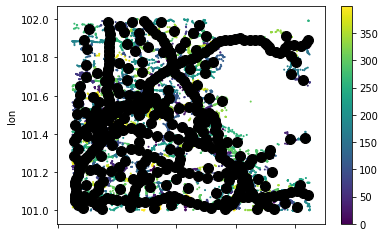

In [0]:
#นำ center ของแต่ละจุดมา plot (จุดสีดำคือ centers )
km.plot.scatter(x = 'lat', y = 'lon', c=labels, s=1, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1)

In [0]:
centers

array([[ 13.65879221, 101.14793038],
       [ 13.92948406, 101.58765103],
       [ 14.22090341, 101.2251359 ],
       [ 14.18071267, 101.89379265],
       [ 13.75623678, 101.37328722],
       [ 13.77283732, 101.76445044],
       [ 13.93583574, 101.19901449],
       [ 13.98398966, 101.78290118],
       [ 14.12996759, 101.42207109],
       [ 14.31017756, 101.02317064],
       [ 14.31689693, 101.83933346],
       [ 13.76610563, 101.51792   ],
       [ 14.04632101, 101.0419505 ],
       [ 13.65782095, 101.04946526],
       [ 13.84878385, 101.05128918],
       [ 13.93203077, 101.92423765],
       [ 14.26738827, 101.06454073],
       [ 13.936163  , 101.39157642],
       [ 13.77710819, 101.92203528],
       [ 13.69946656, 101.28189959],
       [ 14.36732752, 101.84722107],
       [ 14.07678436, 101.8179837 ],
       [ 14.0758533 , 101.35377774],
       [ 14.40821679, 101.10031934],
       [ 13.68521168, 101.41381072],
       [ 14.00811422, 101.5340886 ],
       [ 13.73542135, 101.02204932],
 

In [0]:
#นำ center มา plot ลงในแผนที่
m = folium.Map(       # plot GPS of car(vid) in map
    width='100%', 
    height='100%',
    location=[13.655450,	102.799183	],
    zoom_start=8,
    tiles='Stamen Terrain'
)
m.add_child(plugins.HeatMap(centers))

m

In [0]:
#นำจุดที่ได้จาก KMean มาหาเส้นทาง โดยใช้ DBScan
#X_principal คือจุดทั้งหมดที่ได้จาก KMean
from sklearn.cluster import DBSCAN
X_principal = pd.DataFrame(centers,columns=['lat','lon']) 
db_default = DBSCAN(eps = 0.0455, min_samples = 3).fit(X_principal) 
labels = db_default.labels_ 

In [0]:
#สร้างตารางของ lat,lon,labels(ประเภทของจุด) ที่ได้มาจาก DBScan
l = pd.Series(labels)
l = pd.DataFrame(l,columns=['labels']) 
P = pd.DataFrame(X_principal,columns=['lat','lon']) 
P = pd.concat([P,l] , axis = 1)

In [0]:
#นำจุด core (labels=0) ของ DBScan มาเก็บไว้ใน test
test = P[P["labels"]!=-1]
display(test)
display(dd)

lat         lon  labels
0    13.658792  101.147930       0
1    13.929484  101.587651       0
2    14.220903  101.225136       0
3    14.180713  101.893793       0
4    13.756237  101.373287       0
..         ...         ...     ...
395  13.894002  101.259901       0
396  14.205372  101.068687       0
397  13.748153  101.478491       0
398  13.802301  101.453724       0
399  13.924606  101.010513       0

[369 rows x 3 columns]

vid        lat  \
time_stamp                                                                 
2019-11-10 09:22:30  00033FB44E310CCEBE14170511AA085D8C6F5D72  13.711517   
2019-11-10 10:37:44  0009CDF6B91678DA38A71FEA98E385DCBA37D701  13.726471   
2019-11-10 19:28:12  0009CDF6B91678DA38A71FEA98E385DCBA37D701  14.370948   
2019-11-10 11:27:23  0009CDF6B91678DA38A71FEA98E385DCBA37D701  13.999584   
2019-11-10 19:39:12  0009CDF6B91678DA38A71FEA98E385DCBA37D701  14.281365   
...                                                       ...        ...   
2019-11-10 20:40:13  FFF901395C6A846426CDA38224A9812C89C84B40  13.652750   
2019-11-10 16:07:16  FFF901395C6A846426CDA38224A9812C89C84B40  13.652730   
2019-11-10 08:54:04  FFF901395C6A846426CDA38224A9812C89C84B40  13.652778   
2019-11-10 20:40:13  FFF901395C6A846426CDA38224A9812C89C84B40  13.652750   
2019-11-10 08:05:26  FFFCB1B8AC3435DA007137AF7BB34F56A0C0C6B8  14.145203   

                            lon  speed  unit_type  
time_stamp                                         
2019-11-10 09:22:30  101.301883     89        1.0  
2019-11-10 10:37:44  101.327863     61        7.0  
2019-11-10 19:28:12  101.089389     65        7.0  
2019-11-10 11:27:23  101.221028     25        7.0  
2019-11-10 19:39:12  101.066831     50        7.0  
...                         ...    ...        ...  
2019-11-10 20:40:13  101.064383      1        8.0  
2019-11-10 16:07:16  101.064294      1        8.0  
2019-11-10 08:54:04  101.064155      2        8.0  
2019-11-10 20:40:13  101.064383      1        8.0  
2019-11-10 08:05:26  101.370286     55        3.0  

[228978 rows x 5 columns]

In [0]:
#plot core ของ DBScan ลงในแผนที่
t = [(lat,lon) for lat,lon in zip(test["lat"],test["lon"])]
m = folium.Map(       # plot GPS of car(vid) in map
    width='85%', 
    height='85%',
    location=[13.655450,	102.799183	],
    zoom_start=8,
    tiles='Stamen Terrain'
)
m.add_child(plugins.HeatMap(t))

m

In [0]:
display(test) # test คือ เส้นทางที่ทั้งหมดได้จาก model
#เลือกรถ1คันเพื่อทำการทดลอง
find_car = df[df["vid"]=='0009CDF6B91678DA38A71FEA98E385DCBA37D701']
fi = find_car[['lat','lon']]
fi = fi[fi["lat"]>13.65]
fi = fi[fi["lat"]<14.45]
fi = fi[fi["lon"]>101]
fi = fi[fi["lon"]<102]
fi.sort_values('time_stamp',inplace = True)
display(fi)


lat         lon  labels
0    13.658792  101.147930       0
1    13.929484  101.587651       0
2    14.220903  101.225136       0
3    14.180713  101.893793       0
4    13.756237  101.373287       0
..         ...         ...     ...
395  13.894002  101.259901       0
396  14.205372  101.068687       0
397  13.748153  101.478491       0
398  13.802301  101.453724       0
399  13.924606  101.010513       0

[369 rows x 3 columns]

lat         lon
time_stamp                                
2019-11-10 10:32:44  13.702694  101.287058
2019-11-10 10:33:44  13.707497  101.294923
2019-11-10 10:35:44  13.717349  101.311075
2019-11-10 10:37:44  13.726471  101.327863
2019-11-10 10:38:44  13.732911  101.334513
2019-11-10 10:39:44  13.739615  101.341197
2019-11-10 10:44:58  13.748091  101.359460
2019-11-10 10:46:58  13.754793  101.349978
2019-11-10 10:47:58  13.757947  101.344880
2019-11-10 11:24:05  14.003714  101.232295
2019-11-10 11:24:23  14.003899  101.231294
2019-11-10 11:26:23  13.998611  101.222825
2019-11-10 11:27:23  13.999584  101.221028
2019-11-10 12:05:17  14.235366  101.153947
2019-11-10 19:28:12  14.370948  101.089389
2019-11-10 19:29:12  14.362107  101.085478
2019-11-10 19:30:12  14.353632  101.082781
2019-11-10 19:31:12  14.344970  101.079700
2019-11-10 19:32:12  14.336341  101.076448
2019-11-10 19:33:12  14.328517  101.073219
2019-11-10 19:35:12  14.312581  101.072055
2019-11-10 19:37:12  14.297036  101.069032
2019-11-10 19:38:12  14.289366  101.067589
2019-11-10 19:39:12  14.281365  101.066831
2019-11-10 19:40:12  14.273418  101.066118
2019-11-10 19:41:12  14.265775  101.065493
2019-11-10 19:42:12  14.262448  101.067676
2019-11-10 19:46:12  14.259238  101.074490
2019-11-10 20:19:27  14.200408  101.192077
2019-11-10 20:19:36  14.200151  101.192280
2019-11-10 20:20:36  14.197584  101.193524
2019-11-10 20:21:36  14.191855  101.194712
2019-11-10 20:22:36  14.186554  101.198475
2019-11-10 20:23:36  14.178885  101.197350
2019-11-10 20:24:36  14.171066  101.195047
2019-11-10 20:26:36  14.156099  101.190512
2019-11-10 20:27:36  14.149423  101.185625
2019-11-10 20:28:36  14.143934  101.179778
2019-11-10 20:29:36  14.135879  101.179012
2019-11-10 20:30:36  14.128331  101.176627
2019-11-10 20:31:36  14.120206  101.174998

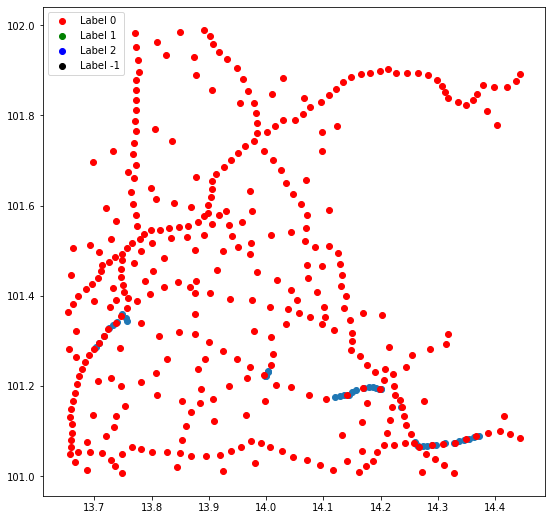

In [0]:
#นำจุดทั้งหมดที่ได้จาก centers ของ KMean มา plot โดยให้ core ของ DBScan เป็นสีแดง
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
#cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
#r = plt.scatter(X_principal['lat'], X_principal['lon'], color ='r'); 
#g = plt.scatter(X_principal['lat'], X_principal['lon'], color ='g'); 
#b = plt.scatter(X_principal['lat'], X_principal['lon'], color ='b'); 
#k = plt.scatter(X_principal['lat'], X_principal['lon'], color ='k'); 
  
# Plotting lat on the X-Axis and lon on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
#plt.scatter(X_principal['lat'], X_principal['lon'], c = cvec) 
#นำจุดพิกัดของรถที่เลือกมา plot เป็นจุดสี น้ำเงิน
plt.scatter(fi['lat'], fi['lon'])
plt.scatter(test['lat'], test['lon'], color = 'r')
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show() 